# Enclosure Model
### ver 0.2 
Last edits by Jonathan:

- Added MPL and APL plot

---

## Introduction

My goals in this worksheet are to solve completely a representative model of common property. The idea is to develop a full positive model of the enclosure decision, and resolve any ambiguities (for example, about what happens when there are multiple equilibria) using theory. 

The model can then be used to see when and where there are conflicts between individual and society. The model can also be used to study income distribution. 

## Building Blocks

First, we flesh out some of the components of the models of the enclosure of land of De Meza and Gould (1987, 1992). Specifically, we try to parlay those models into an explicitly positive model of the enclosure decision, so that we have exact predictions as to what combinations of relative productivity of enclosed land to common land, and population pressure, result in enclosure. This in turn allows one to "see" if enclosure occurs when it "should" from a societal perspective. 

So, we imagine that there is a population of $n$ agents which functions as the labor supply, and a total supply of land $1$. Let $a$ denote enclosed land, so that $t=1-a$ is common land. 

Throughout, we will remain completely agnostic about who, exactly, the ownership group of a particular parcel of land is. One can imagine that this is a person or group of persons in the population, or someone else. We just assume that the enclosure decision for a parcel is atomistic.

When agents work in the enclosed sector, they earn a competitive wage, $w$, which shall be equal to the marginal product in "enclosed production." When agents work on common land, they earn average product of labor on the commons.

# Comment on De Meza and Gould 

De Meza and Gould's great model is afflicted by one potential problem: they assume increasing returns in enclosed production, and this assumption is hiding in plain site. When production is at $a$ private sites, each with a production function of $f(l_i)$, say, then total output is:

$$
Y = \sum_{i=1}^a f(l_i)
$$

If all producers use the same amount of labor, this then gives aggregate production on enclosed land of:

$$
Y=af(l)
$$

So, when viewed as an aggregate production function, this suggests that there are increasing returns in production. For example, one might view the production function as something like $al^\alpha$. 

### The way around this...

Obviously, the model should not include increasing returns in production in one sector, and more might be learned about the essence of the commons problem if one used a more nuetral approach. So, for example, if $Y=f(a,l)$ is a CRS production function, one could then posit the existence of a private production industry that competitively hires labor and land. Income in this sector will be exhausted between wages and land rental, with $w=MP_l$ and $r=MP_a$. We will proceed in this fashion...



## Enclosed Production

There is a CRS technology by which output is produced that uses enclosed land and wage labor to produce a numeraire. This technology is:

$$
q=\theta \sqrt{al}
$$

where $q$ is output, $a$ is (enclosed) land employed in production, and $l$ is labor hired. This gives us a rental rate and a wage, assuming a competitive enclosed land sector:

$$
r=\frac{\theta}{2}\left(\frac{l}{a}\right)^\frac{1}{2},\quad w=\frac{\theta}{2}\left(\frac{a}{l}\right)^\frac{1}{2}
$$

which exhausts total output between labor and land. 

## Common Production


The total available supply of labor is $n$. If $l$ units of labor are employed in the enclosed sector, then $e=n-l$ units of labor are working on the commons, which is of size $t=1-a$. If we suppose that common production is dictated by a function of the form:

$$
q = \sqrt{te}
$$


Average product on the commons is then:

$$
\frac{\sqrt{te}}{e}=\left(\frac{1-a}{n-l}\right)^\frac{1}{2}
$$

Also, now $\theta$ functions as a measure of relative TFP in private production versus the commons.

## Labor Market Equilibrium

We imagine that the labor market clears in two steps. First, land enclosure decisions are made, and then, labor allocations are determined. Taking the second decision first, we see that in equilibrium the wage must be equal to average product on the commons, so that:

$$
\left(\frac{1-a}{n-l}\right)^\frac{1}{2}=\frac{\theta}{2}\left(\frac{a}{l}\right)^\frac{1}{2}
$$

Solving this gives an equilibrium labor allocation of:

$$
l(a)^*=\frac{\theta^2}{4}\left(\frac{na}{1-a + \frac{\theta^2}{4}a}\right)
$$

Note that this function is increasing in $a$, so that $\frac{\partial l}{\partial a}>0$, and can be thought of as an expression for the share of labor used in enclosed production. The second derivative is indeterminate and could be either positive or negative. 

*Note: it can be shown quite generally that this "share" function will increase at an increasing rate when $\theta$, relative private TFP is small.*

Plugging $l^*$ into the rental rate on land gives:

$$
r^*(a)=n^\frac{1}{2}\frac{\theta^2}{4}\left(1-a+\frac{\theta^2}{4}a\right)^{-\frac{1}{2}}
$$

This function may be either increasing or decreasing in $a$, which depends only on whether the denominator is increasing in $a$ or not. One can show (or even just see from the above) that 

$$
\frac{\partial r^*}{\partial a} > 0 \quad\rightarrow\quad \theta < 2 \\
\frac{\partial r^*}{\partial a} = 0 \quad\rightarrow\quad \theta = 2 \\
\frac{\partial r^*}{\partial a} < 0 \quad\rightarrow\quad \theta < 2 
$$

In DG, it only the first possibility arises because of the increasing returns assumption.

#### Code for plots and analysis

$F(\textit{labor}, \textit{land})$ is the production technology on the commons land. 

$G(\textit{labor}, \textit{land}) = \theta \cdot F(\textit{labor}, \textit{land})$ is the technology on enclosed lands.

Since the technology is Cobb-Douglas we'll use several simple tricks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [2]:
def f(labor, land):
    '''production technology on commons/un-enclosed land'''
    return (land*labor)**(1/2)

def g(labor, land, th):
    '''production technology on enclosed land'''
    return th * f(labor, land)

def mple(labor, land, th):
    '''marginal product of Labor on enclosed land'''
    return (1/2) * g(labor, land, th)/labor

def mpte(labor, land, th):
    '''marginal product of Land on enclosed land'''
    return (1/2) * g(labor, land, th)/land

def mplu(labor, land):
    '''marginal product of Labor on unenclosed land'''
    return (1/2) * f(labor, land)/labor

def aplu(labor, land):
    '''average product of Labor on unenclosed land'''
    return f(labor, land)/labor

def lopt(a, n, th):
    '''optimal labor allocation (from MPLe = MPLu) given enclosed land a'''
    thsq = th**2
    return (thsq*n*a)/(1-a+a*thsq) 

def leq(a, n, th):
    '''equilibrium allocation (from MPLe = APLu) given enclosed land a'''
    thsq = (th**2)/4
    return (thsq*n*a)/(1-a+a*thsq) 

def req(a, n, th):
    '''Equilibrium rental rate of land given enclosed land a'''
    return n**(1/2) * (th**2)/4  * (1-a+a*(th**2)/4  ) **(-1/2) 

def totalq(a, n, th):
    '''total output in the economy given '''
    le = leq(a,n,th)
    return f(n-le, 1-a)  + g(le, a, th)

In [3]:
def plotmpts(a=1/2, n=1, th=1):
    ll = np.linspace(0.001, n-0.001, 50)
    plt.figure(figsize=(10,6))
    plt.plot(ll, mple(ll, a, th))
    plt.plot(ll, mplu(n-ll, 1-a))
    plt.plot(ll, aplu(n-ll, 1-a))
    plt.xlabel('l - labor')
    plt.axvline(leq(a, n, th), linestyle=':')
    plt.axvline(lopt(a, n, th), linestyle='-')
    plt.axvline(n, linestyle='-')
    plt.title('MPL and APL on enclosed and unenclosed lands')
    plt.ylim(0,3)
    plt.xlim(0,1)

### Labor allocation plot

Labor supply to the farms on enclosed lands is given by the average product of labor (APL) that a worker could earn on the commons.

In [4]:
interact(plotmpts, a=(0,1,0.01), n=(0.5,1,0.05),th=(0.8,1.6,0.1));

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

#### Equilibrium land rent as a function of enclosed land `a`

$$
r^*(a)=n^\frac{1}{2}\frac{\theta^2}{4}\left(1-a+\frac{\theta^2}{4}a\right)^{-\frac{1}{2}}
$$


In [5]:
def plotreq(n=1,th=1,c=1):
    aa = np.linspace(0, 1.0, 20)
    plt.title("Eqn. land rental as a function of enclosure rate a")
    plt.plot(aa, req(aa,n,th))
    plt.xlabel('a')
    plt.axhline(c, linestyle="dashed")

In [6]:
interact(plotreq, n=(0,3,0.1), th=(1.5,3,0.25));

interactive(children=(FloatSlider(value=1.0, description='n', max=3.0), FloatSlider(value=1.5, description='th…

#### Total output net of land enclosing costs 

If land enclosed is $a$ then total output net of enclosure costs are:

$$
\theta \cdot F(l(a)^*, a) + F(n-l(a)^*, 1-a) - c \cdot a
$$


In [7]:
def plotY(n = 1, th = 1, c = 1):
    '''Plot total income net of clearing costs'''
    aa = np.linspace(0, 1.0, 20)
    plt.title("total output as function of enclosure a")
    plt.plot(aa, totalq(aa, n, th) - c*aa)
    plt.xlabel('a')
    #plt.ylim(0,1.5)

In [8]:
interact(plotY,  n=(0.5,1,0.05),th=(0.8,1.6,0.1), c=(0,1.5,0.1));

interactive(children=(FloatSlider(value=1.0, description='n', max=1.0, min=0.5, step=0.05), FloatSlider(value=…

IF $\theta=1$ (no technological advantage) then it's efficient to either not enclose or completely enclose

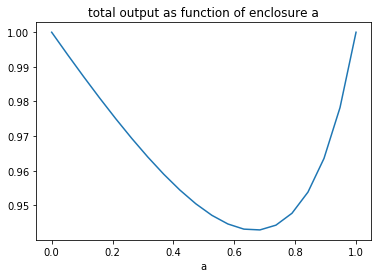

In [9]:
plotY(n=1, th = 1.0, c= 0.0)

If  $\theta>1$ then it is INefficient to enclose so long eas enclosure cost is not too high.

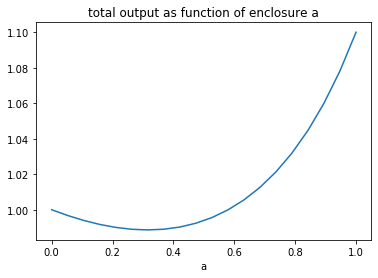

In [10]:
plotY(n=1, th = 1.3, c= 0.2)

NOTE: The remainder of the notebook is as in Matt's original.

---


### Equivalently...

It turns out that a lot can be said about the model just be looking at the corners of the $r^*$ function. The rental rate on land in the event that there is no enclosure is: 

$$
r^*(0)=n^{\frac{1}{2}}\frac{\theta^2}{4}
$$

While the rental rate when all land has been enclosed is:

$$
r^*(1) = n^{\frac{1}{2}}\frac{\theta}{2}
$$

So, right away, we can see $r^*(1)>r^*(0)$ whenever $\theta<2$. In this case, there is a potential for multiple equilibria where either all land is enclosed or none is. By contrast, if $\theta\geq 2$, the rental rate on land is non-increasing in $a$, and hence there may be either complete enclosure of the commons, or some amount of interior closure.

# A positive model of enclosures

We can now "solve" the model and show when enclosures will happen, when they will be complete, etc. This exercise will comprise the predictive aspect of the theory.

The way to do this, it turns out, is to think about the case in which $\theta>2$ and the case in which $\theta<2$ seperately. This is like asking "what happens when land is productive relative to common production? What about when it isn't?"

Suppose that the costs of enclosure are given by $c$. Hence, if $r^*>c$, the owners of the parcel will enclose land. Start with $\theta > 2$. Then, we can ask: will all land be enclosed? 

## Productive private production $\theta>2$

### All land enclosed

If $r^*>c$ when $a=1$, we will have full enclosure; as argued above, in this parameter range, $r^*$ is always decreasing in $a$, so if it is larger than $c$ at its smallest value, we have full enclosure. In parametric terms:

$$
n^\frac{1}{2}\frac{\theta}{2}>c
$$

Which can be written as:

$$
n > 4\left(\frac{c}{\theta}\right)^2
$$

### Some land enclosued $\theta>2$

If $r^*(0)>c$, but $r(1)^*<c$ when $a=1$, some land will be enclosed but not all of it. In equilibrium, then $r=c$. Of course, $r^*(1)<c$ is the reverse of our previous condition. The condition that $r^*(0)>c$ can be rearranged to give:

$$
n > 16\left(\frac{c}{\theta^2}\right)^2
$$

Let's plot these two conditions in $\theta,n$ space - which will tell us which combinations of technology and population pressure result in enclosure, provided technology is relatively good ($\theta>2$)

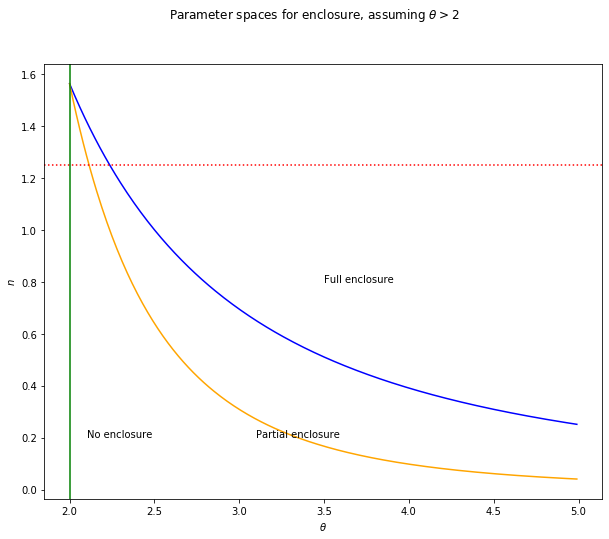

In [11]:
c = 1.25
t2range = np.arange(2, 5, .01)

fig, ax = plt.subplots(figsize=(10, 8))
c1 = 4*(c/t2range)**2
c2 = 16*(c/t2range**2)**2

bline = ax.plot(t2range, c1, color='blue')
oline = ax.plot(t2range, c2, color='orange')

hline = ax.axhline(c, color = 'red', linestyle=':')
vline = ax.axvline(2, color= 'green')

text1 = ax.text(3.5, .8, 'Full enclosure')
text2 = ax.text(3.1, .2, 'Partial enclosure')
text3 = ax.text(2.1, .2, 'No enclosure')

xl = ax.set_xlabel(r'$\theta$')
yl = ax.set_ylabel(r'$n$')

title1 = fig.suptitle(r'Parameter spaces for enclosure, assuming $\theta>2$')

So, we see from the above, we have good production technology, but it only comes into usage when there is sufficient congestion on the commons as a function of $n$. This happens because if congestion is low, production on the commons is relatively attractive.  

## Potential Multiplicity, and no partial enclosure $\theta<2$

Now, it is the case that the rental rate on land is always increasing in $a$! So, when $r^*(0)$ and $r^*(1)$ bracket $c$, or not, the consequences are different. Either full or no enclosure are possible, then, if:

$$
r(0)<c,\quad r(1)>c
$$

If it is the case that $r(0)>c$, we will of course have only full enclosure, even when there are increasing returns to enclosure. This requires:

$$
n > 16\left(\frac{c}{\theta^2}\right)^2
$$

which is the same as previous, but we now can extend this to the case in which $\theta<2$. Again, there will be no enclosure in this range, ever, if it is the case that $r(1)<c$, which requires that:

$$
n < 4\left(\frac{c}{\theta}\right)^2
$$

This is kind of neat, because the curves cross at a point, and the area between them now has a different meaning...

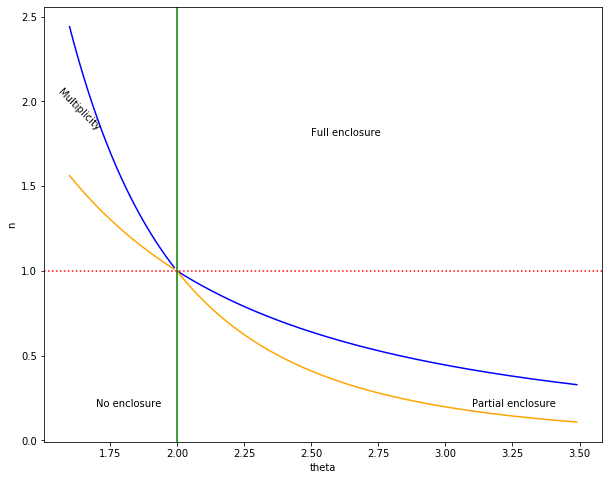

In [12]:
c = 1
t2range = np.arange(2, 3.5, .01)

c1 = 4*(c/t2range)**2
c2 = 16*(c/t2range**2)**2

fig, ax = plt.subplots(figsize=(10, 8))
bline = ax.plot(t2range, c1, color='blue')
oline = ax.plot(t2range, c2, color='orange')

rline = ax.axhline(c, color = 'red', linestyle=':')
gline = ax.axvline(2, color= 'green')

text1 = plt.text(2.5, 1.8, 'Full enclosure')
text2 = plt.text(3.1, .2, 'Partial enclosure')
text3 = plt.text(1.7, .2, 'No enclosure')
text4 = plt.text(1.55, 1.83, 'Multiplicity', rotation=-45)

xlab = ax.set_xlabel('theta')
ylab = ax.set_ylabel('n')

tl2range = np.arange(1.6,2,.01)
c3 = 16*(c/tl2range**2)**2
c4 = 4*(c/tl2range)**2

bline2 = plt.plot(tl2range, c3, color='blue')
oline2 = plt.plot(tl2range, c4, color='orange')

## Equilibrium selection under multiplicity

The above model about sums things up. What is interesting - as we shall see - is that, from a welfare perspective, there may be enclosure when there shouldn't be, and there may not be enclosure when there should be. Before getting to that, however, we will first take actions to remove the ambiguity of outcome in the "Multiplicity" region. 

### Global games

The global games literature (Morris and Shin, 2003) show that introducing a small amount of randomness into the information sets of players, and then allowing players to use a switching strategy (around their private signal), results in a unique equilibrium for different values of the states. Morris and Shin (2003) also show how to find this equilbrium. 

So, we now assume that everyone now has a fairly precise but random signal of $\theta$ with arbitrary distribution. The equilibrium to be found is such that:

If a signal $\theta_i>\theta^*$, enclose, while if $\theta_i<\theta^*$, do not, where $\theta^*$ is a cutoff derived from being indifferent between enclosure and not enclosing _when the agent has a uniform prior over the aggregate fraction of agents enclosing_. That is, as Morris and Shin (2003) show, we can find the cutoff $\theta$ by solving:

$$
\int_0^1 (r(a) - c)da = 0
$$

for $\theta^*$, which can then be thought of as the technological tipping point. 

So we need to compute:

$$
\int_0^1\left(n^\frac{1}{2}\frac{\theta^2}{4}\left(1-a+\frac{\theta^2}{4}a\right)^{-\frac{1}{2}}-c\right)da=0
$$

Let's use a little sympy to do this so we don't mess around...

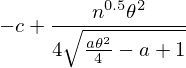

In [13]:
from sympy import *

init_printing()

n, theta, a, c = symbols('n theta a c')
igrand = n**(1/2)*theta**2/4*1/sqrt(1 - a + theta**2/4*a) - c
igrand

Computing the integral gives us:

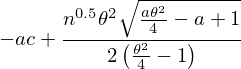

In [14]:
integrate(igrand, a)

Evaluating the above at the limits as part of the calculation gives:

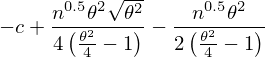

In [15]:
integrate(igrand, (a, 0, 1))

Let's write this as:

$$
\frac{\theta^2n^\frac{1}{2}}{2}\frac{\frac{\theta}{2}-1}{\frac{\theta^2}{4}-1}-c
$$

Or

$$
\frac{\theta^2n^\frac{1}{2}}{2}\frac{\frac{\theta}{2}-1}{\left(\frac{\theta}{2}-1\right)\left(\frac{\theta}{2}+1\right)}-c
$$



So, we now have:

$$
\frac{\theta^2n^\frac{1}{2}}{\theta+2}-c
$$

Which should give us two solutions for $\theta$. But we are best off thinking about this as defining $n=n(\theta)$, where $n(\theta)$ is:

$$
n = \frac{c^2(\theta^2+2)^2}{\theta^4}
$$

So, whenever our parameters are above this line, we have enclosure, but below it we do not. In the end, here is our complete figure:

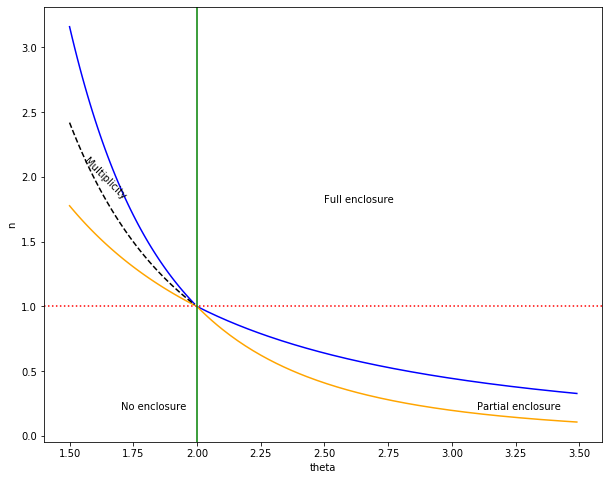

In [16]:
c = 1
t2range = np.arange(2, 3.5, .01)

c1 = 4*(c/t2range)**2
c2 = 16*(c/t2range**2)**2

fig, ax = plt.subplots(figsize=(10, 8))
bline = ax.plot(t2range, c1, color='blue')
oline = ax.plot(t2range, c2, color='orange')

rline = ax.axhline(c, color = 'red', linestyle=':')
gline = ax.axvline(2, color= 'green')

text1 = ax.text(2.5, 1.8, 'Full enclosure')
text2 = ax.text(3.1, .2, 'Partial enclosure')
text3 = ax.text(1.7, .2, 'No enclosure')
text4 = ax.text(1.55, 1.83, 'Multiplicity', rotation=-45)

xlab = ax.set_xlabel('theta')
ylab = ax.set_ylabel('n')

tl2range = np.arange(1.5,2,.01)
c3 = 16*(c/tl2range**2)**2
c4 = 4*(c/tl2range)**2

ncut = c**2*(tl2range**2 + 4*tl2range + 4)/tl2range**4

bline2 = ax.plot(tl2range, c3, color='blue')
cline2 = ax.plot(tl2range, c4, color='orange')
ggline = ax.plot(tl2range, ncut, color='black', linestyle='--')

It worked quite well...we now can see how enclosure depends upon population pressure and the relative productivity of private production technology...even when there is a little strategic uncertainty caused by contagion.

### Jonathan's extension

So, this is our atomistic enclosure model...what if we added some market power in the enclosure decision? What would that change? 


### Predictions

In terms of the great Greg Clark debate, this model argues that enclosure will eventually occur at some critical population level, even if land is not very productive in private production. 

# Optimality (did I do this right?)

Based on all of the above, is enclosure optimal in the sense that it maximizes total societal income? This would be the clue to seeing whether or not enclosure might occur even if it isn't in the best interests of society, given our "complete" positive model. 

Income is:

$$
Y = ra + wl +\sqrt{(n-l)(1-a)}-ca
$$

Using our expressions for the rental rate and the wage, we have:

$$
Y = \theta\sqrt{al}+\sqrt{(n-l)(1-a)}-ca
$$

## First-best labor allocation

We could solve this in a number of fashions. First, let's consider the first-best, but let's do this sequentially so we first solve things for $l$ given $a$, and then look at $a$. We have the derivative of the above with respect to $l$ as:

$$
\frac{\theta}{2}\sqrt{\frac{a}{l}} - \frac{1}{2}\sqrt{\frac{1-a}{n-l}}=0
$$

This describes optimal labor given $a$, and we can see already one source of inefficiency is caused by the overuse of common land. First-best labor allocation would correct this. Anyways, we find that:

$$
l^o = \frac{\theta^2an}{\theta^2a-a+1}
$$

If we plug this back into $Y$ and simplify, we have:

$$
Y=\sqrt{n}\left(\theta^2a + 1 - a\right)^\frac{1}{2}-ca
$$

So, as before, we see that the behavior of this welfare function is different depending on whether or not $\theta >1$. If $\theta>1$, we can see that welfare can be increasing, depending upon the size of $c$ and $n$. First, compute the derivatives:

$$
\frac{dY}{da}=(\theta^2-1)\sqrt{n}\left(\theta^2a + 1 -a\right)^{-\frac{1}{2}}-c
$$


Clearly, if the above derivative is greater than zero at $a=0$, there should be some enclosure. This condition is:

$$
(\theta^2-1)\sqrt{n}-c>0 \quad \rightarrow \quad n > \left(\frac{c}{\theta^2-1}\right)^2
$$

Further, if the derivative is greater than zero at $a=1$, enclosure should be full. This condition is:

$$
\frac{\theta^2-1}{\theta}\sqrt{n}-c>0\quad\rightarrow\quad\left(\frac{\theta c}{\theta^2-1}\right)^2
$$

The region of the parameter space where the first condition is satisfied, but not the second, means that some but not complete enclosure is optimal. Of course, all of this applies only if $\theta>1$. If $\theta$ equals one, or is less than one, we have nothing. 

### Comment

Because we have now somehow solved the overuse of the commons problem inherent in average product returns, the only tradeoff is between getting a more productive technology when $\theta>1$, but at an output cost of $c$. That's why we don't just have full enclosure. 


## Second-best

Now, one might argue that the correct question to ask would be: what amount of land should be enclosed, if common land was open access and labor usage was dictated by average product? In this case, we find that our social welfare function is:

$$
Y=\sqrt{n}\frac{\frac{\theta^2}{2}a+1-a}{\sqrt{\frac{\theta^2}{4}a+1-a}}-ca
$$

This function resembles the one for efficient $Y$, but is a little more agressive in regards its opinions about enclosure. One can show that the first part of the function is either monotone decreasing in $a$ or increasing in $a$, and that this depends entirely on $\theta$. (At least my gut is that this is the case).

Let's first try to understand what the aggregate output function looks like:

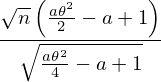

In [17]:
n, theta, a, c = symbols('n theta a c')

Y1 = sqrt(n) * (theta**2/2*a + 1 - a) / sqrt(theta**2/4*a + 1 - a)
Y1



The derivative of this expression wrt $a$ is (perhaps this can be simplified):

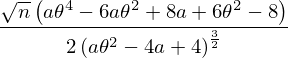

In [18]:
dY1da = diff(Y1, a).factor().simplify()
dY1da

And then factored:

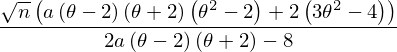

In [19]:
dY = sqrt(n)*(factor( a*theta**4 - 6*a*theta**2 + 8*a) + factor(6*theta**2 - 8)) / (2 *(a*(theta-2)*(theta+2) - 4))
dY

One can see that from the above that at $\theta=2$, the derivative is constant, positive, and independent of $a$. It looks to me like the derivative is always increasing in $a$ when $\theta<2$, and always decreasing in $a$ when $\theta>2$. The following lets one mess around with a plot of the net production function and its derivative (in red). 

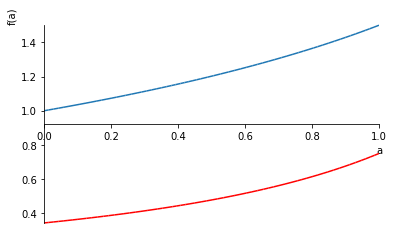

In [20]:
Theta = 1.5

p = plot(dY1da.subs({theta:Theta, n:1}), (a, 0, 1), line_color='r', show=False)
p.extend(plot(Y1.subs({theta:Theta, n:1}), (a, 0, 1), show=False))
p.show()

# Things about the function to be proven rigorously

So, I'm fairly certain we can say the following about the function:

- When $\theta>2$, Y increases in $a$ at a decreasing rate. 
- When $\theta<2$, Y increases i $a$ at an increasing rate. 
- When $\theta=2$, Y is independent of $a$. 

Based on this, we can say:

- When $\theta>2$, it is possible to have either full, partial, or no enclosures be optimal.
- When $\theta<2$, it is either the case that full or no enclosures are optimal.

So, we can basically determine everything we need to using the value of the function and its derivatives. 

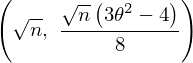

In [21]:
Y1.subs({a:0}), dY1da.subs({a:0}).simplify()

Here is the value of the function and its derivatives at a value of $a=1$:

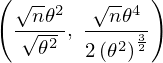

In [22]:
Y1.subs({a:1}).simplify(), dY1da.subs({a:1}).simplify()

## Full enclosures with $\theta>2$ and Optimum Welfare

Since the derivative of $Y$ with respect to $a$ is always decreasing in $y$, if it is the case that that $\frac{dY}{da}|_{a=1}>c$, then we should have full enclosures. This occurs when:

$$
\frac{\sqrt{n}\theta}{2}>c\quad\rightarrow\quad n \geq \frac{4c^2}{\theta^2}
$$

Maybe this should have been obvious, but this exactly matches the positive prediction of the model. 

Enclosures should be partial, then, when this condition is reversed and we have: $\frac{dY}{da}|_{a=0}>c$, which requires:

$$
\sqrt{n}\frac{\left(3\theta^2-4\right)}{8} \geq c\quad\rightarrow\quad n \geq \left(\frac{8c}{3\theta^2-4}\right)^2
$$

This is NOT the same as the positive model, which is going to take some ruminating over! Note that enclosures begin, according to the positive model, when 

$$
n>\left(\frac{4c}{\theta^2}\right)^2
$$

Comparing these two, we see that the socially optimal dividing line lies _below_ the other line whenever $\theta>2$, meaning that it would be desirable if there were some enclosure even though no one is undertaking it!

Full enclosures with $\theta<2$ and Optimum Welfare

Now, things are a little easier because there are increasing returns. So, enclosures are either optimal or not based on whether $Y(1)>c$, and we don't have to worry about anything else. 

So, this means that we just have 

$$
\theta \sqrt{n}-c> \sqrt{n}
$$

So, our locus becomes:

$$
\frac{c^2}{(\theta-1)^2}
$$

Does the function take a minimum or maximum value on in its range? Let's make it a full plot...

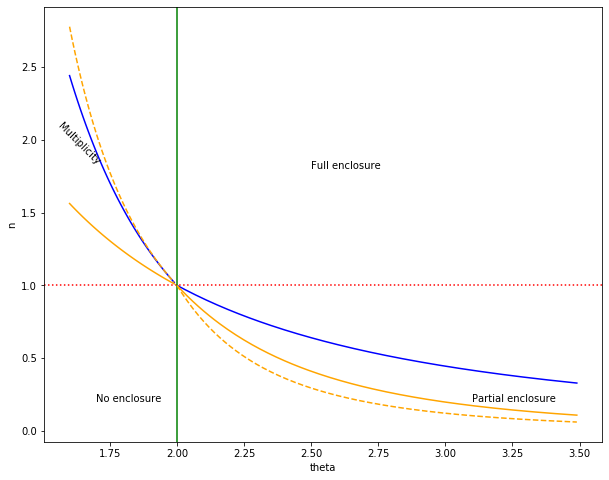

In [23]:
c = 1
t2range = np.arange(2, 3.5, .01)

c1 = 4*(c/t2range)**2
c2 = 16*(c/t2range**2)**2

fig, ax = plt.subplots(figsize=(10, 8))
bline = ax.plot(t2range, c1, color='blue')
oline = ax.plot(t2range, c2, color='orange')

rline = ax.axhline(c, color = 'red', linestyle=':')
gline = ax.axvline(2, color= 'green')

text1 = plt.text(2.5, 1.8, 'Full enclosure')
text2 = plt.text(3.1, .2, 'Partial enclosure')
text3 = plt.text(1.7, .2, 'No enclosure')
text4 = plt.text(1.55, 1.83, 'Multiplicity', rotation=-45)

xlab = ax.set_xlabel('theta')
ylab = ax.set_ylabel('n')

tl2range = np.arange(1.6,2,.01)
c3 = 16*(c/tl2range**2)**2
c4 = 4*(c/tl2range)**2

bline2 = plt.plot(tl2range, c3, color='blue')
oline2 = plt.plot(tl2range, c4, color='orange')

tl3range = np.arange(1.6, 2, .01)
sol2 = (c/(tl3range-1))**2

sol3 = (8*c/(3*t2range**2 - 4))**2

sol2line = plt.plot(tl3range, sol2, color='orange', linestyle='--')
sol3line = plt.plot(t2range, sol3, color='orange', linestyle='--')    